# What is linear regrssion?
- Linear regression is a supervised machine learning algorithm, which calculates a best fit line for the input data.
- Used to predict continuous data by modeling the data.

# Mathematical Equation
y = m*x + b

where, <br>
b = $\overline{y} - m*\overline{x} $ <br><br>
m = $\frac {\sum_{i=1}^{n} (y_i - \overline{y}) * ({x_i} - \overline{x})} {\sum_{i=1}^{n}({x_i} - \overline{x})}$

(50, 1) (50,)


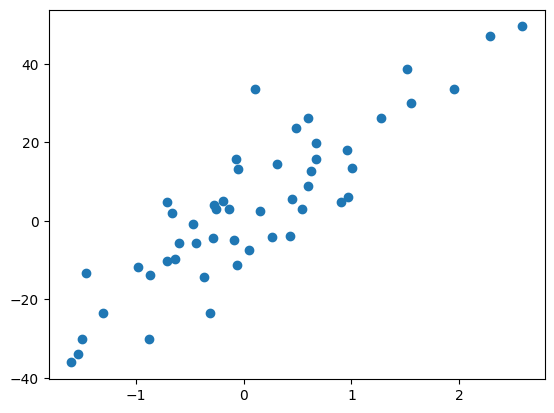

In [14]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

input, output = make_regression(n_samples=50, n_features=1, noise=10)
print(f"{input.shape} {output.shape}")
train_df = pd.DataFrame({
    'feature_1': input[:, 0],
    'label': output
})
plt.tight_layout()
plt.scatter(train_df['feature_1'], train_df['label'])
plt.show()

# Linear Regression from Scratch

In [ ]:
class manual_lr:
    """
    get_slope_intercept: Returns m and b of the lines.
    m: slope of the line
    b: intercept of the line
    """

    def __init__(self) -> None:
        self.m = None 
        self.b = None  

    def get_slope_intercept(self, input_df: pd.DataFrame):
        """
        input_df: consists of a single continuous independent variable and one dependent variable
        """ 
        pass 
        # return m, b